<a href="https://colab.research.google.com/github/shreyaspatil17/ML_assignments/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression** is a supervised learning algorithm used for predicting a dependent variable "y" based on independent variables "x". It assumes a linear relationship between the input features and the target variable.

Equation for a Simple Linear Regression Model:
y=mx+c

Linear Regression Equation: y = 4.587898609975469x + 12.584627964022907
Polynomial Regression Equation: y = -0.2202396451905262x^2 + 8.7933413198155x + -2.7341828763510136
Linear Regression MSE: 518.0047015535569, R^2: 0.43709481451010035
Polynomial Regression MSE: 494.54850403523056, R^2: 0.46258418782146604


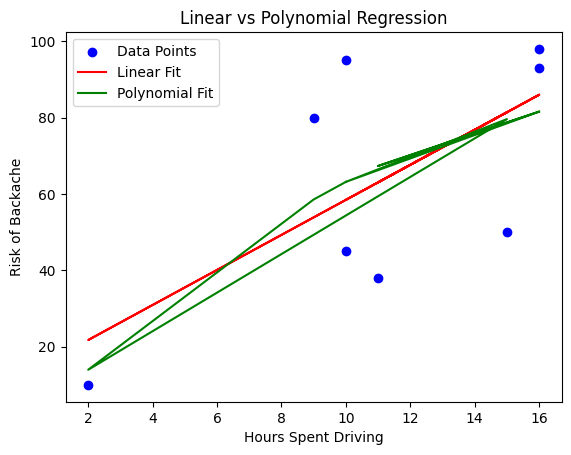

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Sample data: hours spent driving (X) vs. risk of backache (Y)
X = np.array([10,9,2,15,10,16,11,16]).reshape(-1,1)  # Independent variable (hours)
Y = np.array([95,80,10,50,45,98,38,93])  # Dependent variable (risk)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, Y)
Y_pred_linear = linear_model.predict(X)

# Polynomial Regression (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, Y)
Y_pred_poly = poly_model.predict(X_poly)

# Performance Evaluation
mse_linear = mean_squared_error(Y, Y_pred_linear)
r2_linear = r2_score(Y, Y_pred_linear)

mse_poly = mean_squared_error(Y, Y_pred_poly)
r2_poly = r2_score(Y, Y_pred_poly)

# Displaying results
print(f"Linear Regression Equation: y = {linear_model.coef_[0]}x + {linear_model.intercept_}")
print(f"Polynomial Regression Equation: y = {poly_model.coef_[2]}x^2 + {poly_model.coef_[1]}x + {poly_model.intercept_}")

print(f"Linear Regression MSE: {mse_linear}, R^2: {r2_linear}")
print(f"Polynomial Regression MSE: {mse_poly}, R^2: {r2_poly}")

# Plotting
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred_linear, color='red', label='Linear Fit')
plt.plot(X, Y_pred_poly, color='green', label='Polynomial Fit')
plt.xlabel('Hours Spent Driving')
plt.ylabel('Risk of Backache')
plt.legend()
plt.title('Linear vs Polynomial Regression')
plt.show()


Linear Regression MSE: **518.004**, R^2: **0.437**

Polynomial Regression MSE: **494.548**, R^2: **0.462**


Polynomial Regression performed better than Linear Regression:

Lower MSE , meaning it has less error.

Higher R^2 :, meaning it explains more variance.

**Ridge Regression** (L2 regularization) adds a penalty proportional to the square of the coefficients to the loss function. This shrinks the coefficients but does not eliminate them, making it useful when all features contribute to the prediction.


**Lasso Regression** (L1 regularization) penalizes the absolute values of the coefficients, forcing some of them to become exactly zero. This effectively performs feature selection, making it ideal when only a subset of features is important.


**Elastic Net** is a combination of both Ridge and Lasso. It balances between L1 and L2 penalties, making it suitable when there are correlated features and when feature selection is needed but pure Lasso might be too aggressive.

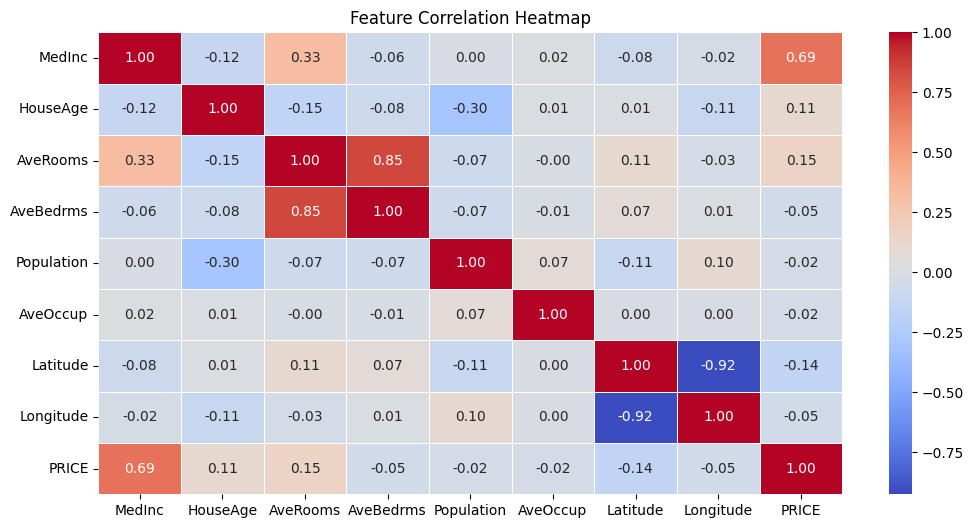

                       R² Score       MSE       MAE
Ridge Regression       0.575816  0.555855  0.533193
Lasso Regression       0.481361  0.679629  0.622201
ElasticNet Regression  0.514765  0.635857  0.597041


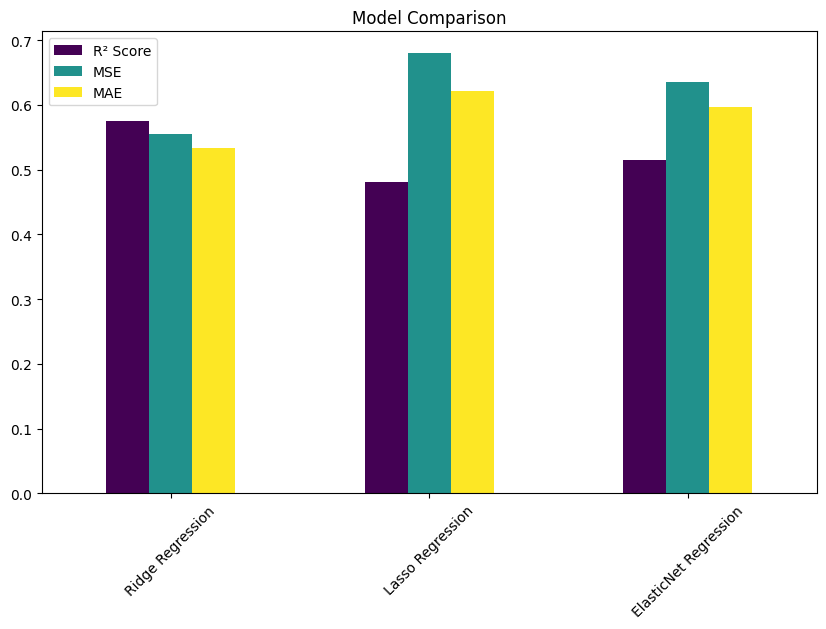

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load Dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

# Display correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Define features and target
X = df.drop(columns=['PRICE'])
y = df['PRICE']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# ElasticNet Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_test)

# Evaluate Models
results = {

    "Ridge Regression": {
        "R² Score": r2_score(y_test, y_pred_ridge),
        "MSE": mean_squared_error(y_test, y_pred_ridge),
        "MAE": mean_absolute_error(y_test, y_pred_ridge)
    },
    "Lasso Regression": {
        "R² Score": r2_score(y_test, y_pred_lasso),
        "MSE": mean_squared_error(y_test, y_pred_lasso),
        "MAE": mean_absolute_error(y_test, y_pred_lasso)
    },
    "ElasticNet Regression": {
        "R² Score": r2_score(y_test, y_pred_elastic),
        "MSE": mean_squared_error(y_test, y_pred_elastic),
        "MAE": mean_absolute_error(y_test, y_pred_elastic)
    }
}

# Print results
results_df = pd.DataFrame(results).T
print(results_df)

# Visualize results
results_df.plot(kind='bar', figsize=(10, 6), title="Model Comparison", colormap="viridis")
plt.xticks(rotation=45)
plt.show()


                          R^2        MSE        MAE
Ridge Regression        0.575816,  0.555855,  0.533193

Lasso Regression        0.481361,  0.679629,  0.622201

ElasticNet Regression   0.514765,  0.635857,  0.597041



1.   Ridge Regression performed the best with the highest R^2 score and the lowest MSE and MAE. This suggests that Ridge handles multicollinearity well and provides a better generalization.
2.   Lasso Regression performed the worst, with the lowest R^2 score , highest MSE , and highest MAE. This suggests that Lasso's feature selection might have removed some important variables.

